In [1]:
import sys
sys.path.append("../../..")

### import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import utility
from pdf2image import convert_from_path
from PIL import Image
from IPython.display import display

##### Read gain data

In [3]:
# df = pd.read_excel("../../../data/yeast_metadata.xlsx", sheet_name="unfiltered_gain")
df = pd.read_csv("/home/abhishekh/Downloads/Oligo_Promotion-main(8) (1)/Oligo_Promotion-main/figure/main figures/fig7/yeast_evolved_genome_metadata.csv")

In [4]:
df.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,kGain_evolved_genome
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119,-3.577119
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871,0.392871
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850,-4.311335
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777,-11.012777
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777,-11.012777


In [5]:
# df.head()

##### Read fitness data

In [6]:
df_finess = pd.read_excel("../../../data/yeast_metadata.xlsx", sheet_name="fitness")
df_finess

,population_name,Plate,Well,Gen70_s_R1,Gen70_s_R2,Gen70_s,Gen70_s_scaled,Gen550_s_R1,Gen550_s_R2,Gen550_s,...,Gen5150_s,Gen5150_s_scaled,Gen7530_s_R1,Gen7530_s_R2,Gen7530_s,Gen7530_s_scaled,Gen10150_s_R1,Gen10150_s_R2,Gen10150_s,Gen10150_s_scaled
0,P1A01,P1,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P1A02,P1,A02,-0.075306,-0.062071,-0.068689,-0.072925,-0.063589,-0.055622,-0.059606,...,0.016666,0.009374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P1A03,P1,A03,-0.077027,-0.076459,-0.076743,-0.080979,-0.046321,-0.042535,-0.044428,...,0.000769,-0.006523,0.008259,0.012947,0.010603,0.006367,0.014491,0.011513,0.013002,0.005710
3,P1A04,P1,A04,-0.071582,-0.080952,-0.076267,-0.080503,-0.052351,-0.056217,-0.054284,...,0.011147,0.003855,0.050515,0.048179,0.049347,0.045111,0.032640,0.032965,0.032803,0.025511
4,P1A05,P1,A05,-0.083521,-0.075293,-0.079407,-0.083643,-0.042366,-0.038459,-0.040412,...,0.011189,0.003897,0.027355,0.027544,0.027449,0.023213,0.032051,0.021394,0.026722,0.019430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,P3H08,P3,H08,0.012884,-0.063161,-0.025138,-0.005443,-0.029671,-0.009803,-0.019737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,P3H09,P3,H09,0.000215,-0.061140,-0.030462,-0.010767,-0.052983,-0.030976,-0.041979,...,0.070635,0.114702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,P3H10,P3,H10,-0.027629,-0.096806,-0.062218,-0.042522,-0.066732,-0.037109,-0.051921,...,0.048310,0.092378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,P3H11,P3,H11,-0.082479,-0.179554,-0.131016,-0.111321,-0.068555,-0.072646,-0.070601,...,0.034874,0.078941,NaN,-0.359102,-0.359102,-0.339407,NaN,NaN,NaN,NaN


##### calculate sum of allele count across all generation

In [7]:
df["sum of alt AC"] = df['G70_alt_counts'] + df['G1410_alt_counts'] + \
df['G2640_alt_counts'] + df['G5150_alt_counts'] + df['G7530_alt_counts'] + df['G10150_alt_counts']
df.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,kGain_evolved_genome,sum of alt AC
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119,-3.577119,11
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871,0.392871,1358
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850,-4.311335,28
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777,-11.012777,5
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777,-11.012777,9


##### Add allele switch column

In [8]:
df["allele switch"] = df["REF"]+ "->" + df["ALT"]
df.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,...,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,kGain_evolved_genome,sum of alt AC,allele switch
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,...,0,0,0,0,11,0,-3.577119,-3.577119,11,C->A
1,34,2-micron,G,T,P1E04,74,104,3,0,0,...,0,217,426,323,156,236,0.392871,0.392871,1358,G->T
2,34,chrII,G,A,P2C06,4,0,1,0,2,...,0,0,0,0,16,12,-4.563850,-4.311335,28,G->A
3,36,chrIX,C,A,P2F11,24,5,39,2,34,...,0,0,0,0,5,0,-11.012777,-11.012777,5,C->A
4,36,chrIX,C,A,P3F11,44,1,38,4,18,...,0,0,0,0,9,0,-11.012777,-11.012777,9,C->A


In [9]:
df = pd.merge(df, df_finess, on ="population_name", how= "left")

In [10]:
# df.shape

In [11]:
# df.columns

In [12]:
# pd.Series(i).str.extract(r'(\d+)').astype(int).values

##### Convert the data to consider the mutation of all generation of every population format

In [13]:
import re

all_mutation = pd.DataFrame()
gen_list = ['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts',
            'G10150_alt_counts']

def extract_integer_from_string(s):

    import re

    # Sample string
    # my_string = "G10150_ref_counts"

    result = re.search(r'\d+', s)

    # Check if there is a match and extract the integer
    if result:
        extracted_integer = int(result.group())
        print(extracted_integer)
    else:
        print("No integer found in the string.")

    return extracted_integer



for i in gen_list:
    new_df_tmp = pd.DataFrame()
    new_df = df[df.loc[:, i]!=0]
    new_df_tmp = new_df[['CHROM', 'Position', 'allele switch', 'population_name']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulate_gain"]
    new_df_tmp.loc[:, 'kGain_evolved_genome'] = new_df.loc[:, 'kGain_evolved_genome']
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    int_gen = extract_integer_from_string(i)
    
    col = "Gen"+ str(int_gen)+ "_s_scaled"
    new_df_tmp.loc[:, "fitness"] = new_df.loc[:, col]

    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)

70
1410
2640
5150
7530
10150


In [14]:
all_mutation.head()

,CHROM,Position,allele switch,population_name,generation,AG,kGain_evolved_genome,allele count,fitness,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,6.067923,7,-0.024371,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,-4.705100,7,-0.024371,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,3.963808,7,-0.024371,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,3.963808,5,-0.095073,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,-2.479826,5,-0.065863,70


In [15]:
mutation_data_G10150 = all_mutation[all_mutation["generation"]=='G10150_alt_counts']
mutation_data_G10150.head()

,CHROM,Position,allele switch,population_name,generation,AG,kGain_evolved_genome,allele count,fitness,generation_number
414789,2-micron,34,G->T,P1E04,G10150_alt_counts,0.392871,0.392871,236,0.034785,10150
414790,chrII,34,G->A,P2C06,G10150_alt_counts,-4.563850,-4.311335,12,0.034504,10150
414791,chrII,38,T->A,P2C06,G10150_alt_counts,-9.926479,-9.926479,14,0.034504,10150
414792,chrII,51,T->G,P2C06,G10150_alt_counts,-8.706765,-8.706765,16,0.034504,10150
414793,chrII,52,G->T,P2C06,G10150_alt_counts,0.948235,0.969741,16,0.034504,10150


##### function to fit regression line

In [16]:
def return_regression_line(x, y):

    """
    Calculate the regression line given input x and y values using Ordinary Least Squares (OLS) method.

    Parameters:
        x (array-like): Input array of independent variable values.
        y (array-like): Input array of dependent variable values.

    Returns:
        tuple: A tuple containing:
            - x_regression (numpy.ndarray): Array of x values for the regression line.
            - y_regression (numpy.ndarray): Array of y values for the regression line.
            - results (statsmodels.regression.linear_model.RegressionResultsWrapper):
                Results of the linear regression model including intercept and slope."""
    
    import numpy as np
    import statsmodels.api as sm
    import matplotlib.pyplot as plt

    X = sm.add_constant(x)

    model = sm.OLS(y, X)
    results = model.fit()

    intercept, slope = results.params

    x_regression = np.linspace(min(x), max(x), 100)
    y_regression = slope * x_regression + intercept

    return x_regression, y_regression, results
    


##### Function to make scatter plot in required form

In [17]:

import pandas as pd
def plot_scatter(data:pd.DataFrame(),x_column, y_column, ax, logy=False):
    
    """
        Plot scatter plots for mutator, non-mutator, and overall populations.
    
        Parameters:
        - data (pd.DataFrame): Input DataFrame containing the data.
        - x_column (str): Name of the column for the x-axis.
        - y_column (str): Name of the column for the y-axis.
        - logy (bool, optional): If True, apply log10 transformation to y-axis. Default is True.
        
        Returns:
        - None
        
        Note:
        - The function generates scatter plots for overall populations
          based on the specified x_column and y_column.

    """
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import spearmanr
    from scipy.stats import pearsonr


    data = data.copy()

    all_population_combined_median  = utility.return_median_data_gen_wise(data, x_column=x_column, y_column=y_column)

    # print(all_population_combined_median)

    norm = plt.Normalize(all_population_combined_median['generation_number'].min(), all_population_combined_median['generation_number'].max())
    sm = plt.cm.ScalarMappable(cmap="mako", norm=norm)
    y_updated = "median "+ y_column
    x_updated = "median "+ x_column

    if logy:
        y_updated = "log10(median " + y_column + ")"
        all_population_combined_median[y_updated] = np.log10(all_population_combined_median["median "+ y_column])

    ax = sns.scatterplot(all_population_combined_median, x = x_updated, y = y_updated, hue="generation_number",ax= ax, legend=True, s = 10, palette='mako')

    offset = 0

    # formatted_correlation_mutator = "{:.2e}".format(all_population_combined_median[x_updated].corr(all_population_combined_median[y_updated]))
    # ax.text((max(ax.get_xlim()) - offset), (max(ax.get_ylim()) - offset), "Corr:" + formatted_correlation_mutator, fontsize=5, color='red', ha='right', va='top')

    all_spearman_corr = "{:.3e}".format(pearsonr(all_population_combined_median[x_updated], all_population_combined_median[y_updated])[0])
    all_spearman_p = "{:.3e}".format(pearsonr(all_population_combined_median[x_updated], all_population_combined_median[y_updated])[1])
    ax.text((max(ax.get_xlim()) -100* offset), (max(ax.get_ylim()) - offset), "Corr:" + str(all_spearman_corr) + "| p- value: " + str(all_spearman_p), fontsize=3, color='black', ha='right', va='top')

    ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True, rotation=0)
    # ax[i].set_ylabel("log10(Median AC)")

    ax.get_legend().remove()
    ax.figure.colorbar(sm, ax=ax)
    # cbar = ax.collections[0].colorbar
    # cbar.ax.yaxis.set_tick_params(labelsize=1)

    # ax.figure.colorbar(sm)

    plt.tight_layout()


    return ax, all_population_combined_median #mutator_population_combined_median, non_mutator_population_combined_median, all_population_combined_median



##### Fig. 6b

In [18]:
all_mutation

,CHROM,Position,allele switch,population_name,generation,AG,kGain_evolved_genome,allele count,fitness,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,6.067923,7,-0.024371,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,-4.705100,7,-0.024371,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,3.963808,7,-0.024371,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,3.963808,5,-0.095073,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,-2.479826,5,-0.065863,70
...,...,...,...,...,...,...,...,...,...,...
500919,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,8.835324,4,0.152402,10150
500920,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,8.835324,2,0.125363,10150
500921,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,8.835324,2,0.146029,10150
500922,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,8.835324,6,0.151053,10150


In [19]:
generation_wise_median_fitness = all_mutation.groupby(["generation_number"])["fitness"].median().reset_index()
generation_wise_median_kgain_evolved = all_mutation.groupby(["generation_number"])["kGain_evolved_genome"].median().reset_index()

combined_df_generation_wise_median_ag_fitness = pd.merge(generation_wise_median_fitness, generation_wise_median_kgain_evolved, on ="generation_number")

In [20]:
# combined_df_generation_wise_median_ag_fitness

In [21]:
generation_wise_median_fitness

,generation_number,fitness
0,70,-0.073257
1,1410,-0.023820
2,2640,0.003452
3,5150,0.034813
4,7530,0.059123
5,10150,0.061676


The R2 value is:  0.9225913632328555


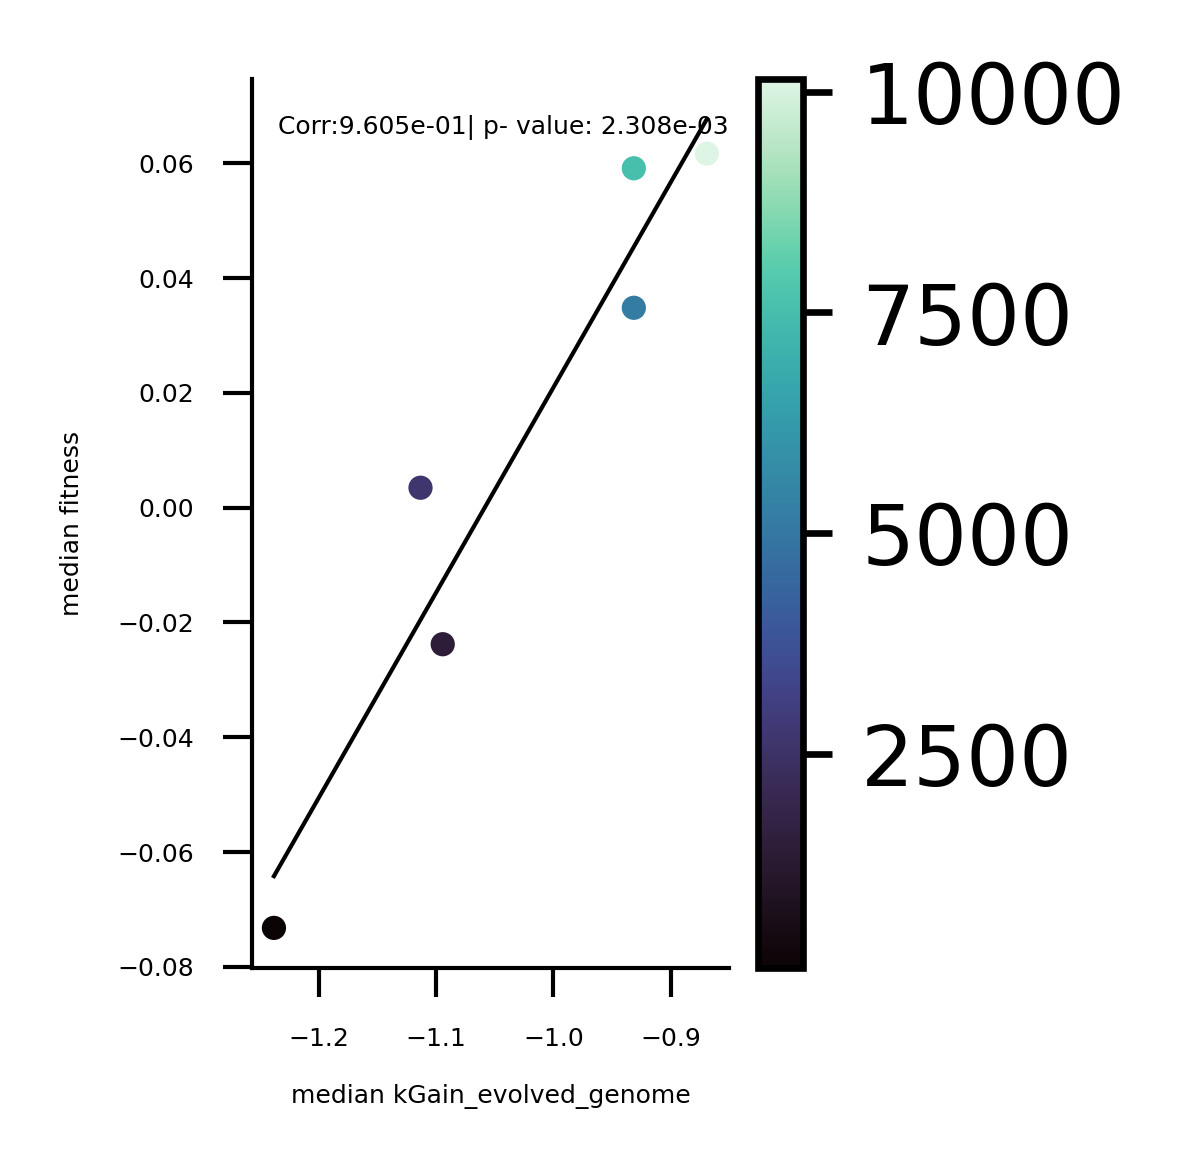

In [22]:
import statsmodels.api as sm
from scipy.stats import pearsonr

generation_wise_median_fitness = all_mutation.groupby(["generation_number"])["fitness"].median().reset_index()
generation_wise_median_kgain_evolved = all_mutation.groupby(["generation_number"])["kGain_evolved_genome"].median().reset_index()

combined_df_generation_wise_median_ag_fitness = pd.merge(generation_wise_median_fitness, generation_wise_median_kgain_evolved)
combined_df_generation_wise_median_ag_fitness.columns = ["generation_number", "median_fitness", "median_kGain_evolved_genome"]

fig, ax = plt.subplots(1,  1, dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax, all_population_combined_median = plot_scatter(all_mutation,  x_column = "kGain_evolved_genome", y_column = "fitness", ax=ax,  logy=False)

x_reg, y_reg, reg_model = return_regression_line(x = combined_df_generation_wise_median_ag_fitness["median_kGain_evolved_genome"], y= combined_df_generation_wise_median_ag_fitness["median_fitness"])

ax.plot(x_reg, y_reg, lw = 0.5, color="black")

from sklearn.metrics import r2_score
r2 = r2_score(combined_df_generation_wise_median_ag_fitness["median_fitness"], reg_model.predict( sm.add_constant(combined_df_generation_wise_median_ag_fitness["median_kGain_evolved_genome"].values) ))

print("The R2 value is: ", r2)
ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True, rotation=0)
# plt.savefig("Yeast median fitness vs median ag scatter plot.pdf", dpi = 600)